In [4]:
from transformers.models.auto.tokenization_auto import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import re

In [5]:
tqdm.pandas()

In [6]:
model_name = "distilroberta-base"

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
# data_dir = r"C:\Users\mchym"
# os.listdir(data_dir)

In [17]:
train_data = pd.read_csv(r"C:\Users\mchym\train_data.csv")
test_data = pd.read_csv(r"C:\Users\mchym\test_data.csv")

In [18]:
train_data.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [19]:
test_data.head()

,sentence,sentiment
0,i loooooooovvvvvveee my kindle not that the dx...,1
1,reading my kindle love it lee childs is good read,1
2,ok first assesment of the kindle it fucking rocks,1
3,you ll love your kindle i ve had mine for a fe...,1
4,fair enough but i have the kindle and i think ...,1


In [20]:
def process_text(text: str):
    
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'[^\w\s]|[\d]', '', text)
    text = re.sub(r'\s\s+', '', text)
    text = text.strip().lower().encode('ascii','ignore').decode()
    return text

In [21]:
train_data['sentence'] = train_data['sentence'].progress_map(process_text)

100%|██████████| 1523975/1523975 [00:09<00:00, 166146.60it/s]


In [22]:
test_data['sentence'] = test_data['sentence'].progress_map(process_text)

100%|██████████| 359/359 [00:00<00:00, 120441.14it/s]


In [24]:
train_data.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [29]:
train_data['sentiment'].nunique()

2

In [25]:
train_data = train_data[train_data['sentence'] !=''].reset_index(drop = True)

In [26]:
test_data = train_data[train_data['sentiment'] >-1].reset_index(drop = True)

In [30]:
print("before")
print("no of duplicated values in train set:", train_data.duplicated().sum())
print("no of duplicated values in test set:", test_data.duplicated().sum())

before
no of duplicated values in train set: 261
no of duplicated values in test set: 261


In [34]:
train_data_processed = train_data[~train_data.duplicated()].reset_index(drop=True)
test_data_processed = test_data[~test_data.duplicated()].reset_index(drop=True)

In [35]:
print("after")
print("no of duplicated values in train set:", train_data.duplicated().sum())
print("no of duplicated values in test set:", test_data.duplicated().sum())

after
no of duplicated values in train set: 0
no of duplicated values in test set: 0


In [37]:
!rm train_data_processed.csv test_data_processed.csv

train_data_processed.to_csv('train_data_processed.csv', index=False)
test_data_processed.to_csv('test_data_processed.csv', index=False)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
train_data_processed['encoded'] = train_data_processed['sentence'].progress_map(tokenizer.encode)
train_data_processed['length'] = train_data_processed['encoded'].map(len)

100%|██████████| 1523602/1523602 [01:28<00:00, 17178.74it/s]


In [39]:
test_data_processed['encoded'] = test_data_processed['sentence'].progress_map(tokenizer.encode)
test_data_processed['length'] = test_data_processed['encoded'].map(len)

100%|██████████| 1523602/1523602 [01:31<00:00, 16613.77it/s]


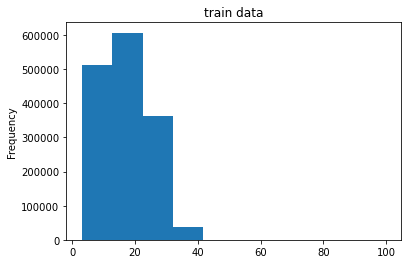

In [40]:
plt.title("train data")
train_data_processed['length'].plot.hist()
plt.show()


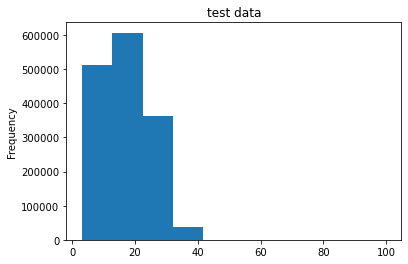

In [41]:
plt.title("test data")
train_data_processed['length'].plot.hist()
plt.show()

In [ ]:
print(train_data_processed['sentiment'].value_counts())
